In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('E:/dataset.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
dataframe = df.copy()

In [5]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [7]:
median = df['Product_Category_2'].median()

In [8]:
df = df.drop('Product_Category_3',axis=1) # deleting this column because it has around 60 % missing value

In [9]:
df['Product_Category_2'].fillna(median,inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 46.2+ MB


In [33]:
df.to_csv('new_dataset.csv')

Let's drop the User_ID and Product_ID column from our dataset as we proceed towards model building

In [21]:
df = df.drop(['User_ID','Product_ID'],axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ MB


Label Encoding

In [23]:
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

DF= pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

DF.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,1,...,0,0,1,0,0,0,0,1,0,0
1,F,0-17,10,A,2,0,1,6.0,15200,1,...,0,0,1,0,0,0,0,1,0,0
2,F,0-17,10,A,2,0,12,9.0,1422,1,...,0,0,1,0,0,0,0,1,0,0
3,F,0-17,10,A,2,0,12,14.0,1057,1,...,0,0,1,0,0,0,0,1,0,0
4,M,55+,16,C,4+,0,8,9.0,7969,0,...,0,1,0,0,1,0,0,0,0,1


In [24]:
DF = DF.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)
DF

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,M,0-17,18-25,26-35,...,51-55,55+,A,B,C,0,1,2,3,4+
0,10,0,3,9.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,9.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,9.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,9.0,368,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
550064,1,0,20,9.0,371,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
550065,15,1,20,9.0,137,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
550066,1,0,20,9.0,365,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


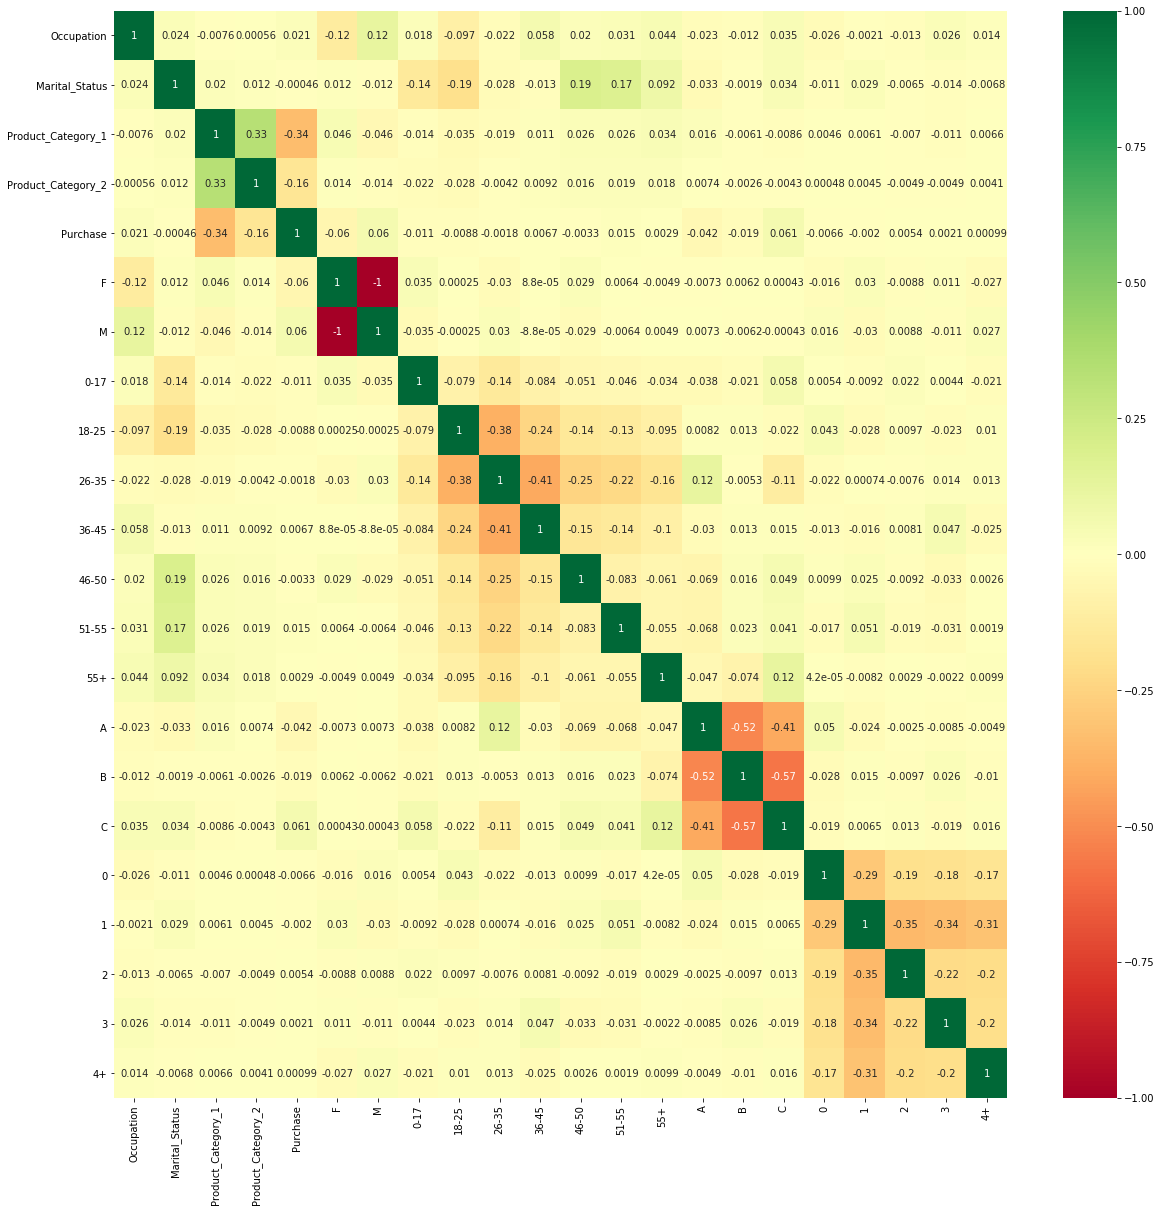

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corr=DF.corr()
heat_map = corr.index
plt.figure(figsize=(20,20))
sns.heatmap(DF[heat_map].corr(),annot = True,cmap = 'RdYlGn')

In [26]:
X=DF.drop('Purchase',axis=1)
Y=DF.Purchase

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
X_train = S.fit_transform(X_train)
X_test = S.transform(X_test)

Model Building

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
print(lr.fit(X_train, Y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
predictions = lr.predict(X_test)
print("Predicted purchases (in dollars) for new costumer:", predictions)

Predicted purchases (in dollars) for new costumer: [ 5593.75782032 10637.75782032 10986.25782032 ... 11197.75782032
  8919.75782032  9347.75782032]


In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))

MAE: 3596.0621704121427
MSE: 22049107.657296795


In [32]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE

In [33]:
xgb_r = xg.XGBRegressor(objective ='reg:linear',n_estimators = 10, seed = 123)
xgb_r.fit(X_train, Y_train)

[08:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[08:52:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
pred = xgb_r.predict(X_test)

In [35]:
rmse = np.sqrt(MSE(Y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  2997.314435


In [36]:
xgb_r.feature_importances_

array([2.2406315e-03, 1.0899155e-03, 9.4468397e-01, 8.2581937e-03,
       1.3370672e-03, 0.0000000e+00, 1.6068977e-03, 1.8792711e-03,
       1.9131101e-03, 2.0248066e-03, 1.6118380e-03, 2.6126539e-03,
       1.5888192e-03, 4.4039274e-03, 1.2785610e-03, 1.4946365e-02,
       1.6880922e-03, 1.1987172e-03, 2.5872735e-03, 2.7792274e-03,
       2.7070567e-04], dtype=float32)

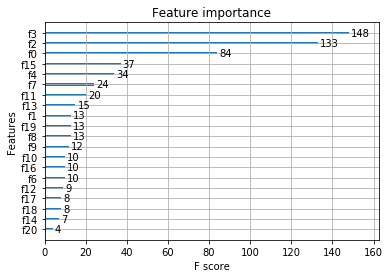

In [38]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(xgb_r)
pyplot.show()

# Exploratory Data Analysis

# Answers of the Questions Asked

In [39]:
malesPurchaserData = df.loc[df['Gender'] == 'M']
malesPurchaseMean = np.mean(malesPurchaserData['Purchase'])
print("Purchase mean for male purchasers = ",malesPurchaseMean)

femalsPurchaserData = df.loc[df['Gender'] == 'F']
femalsPurchaseMean = np.mean(femalsPurchaserData['Purchase'])
print("Purchase mean for femal purchasers = ",femalsPurchaseMean)

Purchase mean for male purchasers =  9437.526040472265
Purchase mean for femal purchasers =  8734.565765155476


In [40]:
labels = []
values = []

for uniqueOccupationValue in df['Occupation'].sort_values().unique():
    OccPurchaserData = df.loc[df['Occupation'] == uniqueOccupationValue]
    OccPurchaserMean = np.mean(OccPurchaserData['Purchase'])
    labels.append(uniqueOccupationValue)
    values.append(OccPurchaserMean)
    
    print("When occupation = ",uniqueOccupationValue," mean purchase value = ",OccPurchaserMean)
    print("------------------------------------------------------------")

When occupation =  0  mean purchase value =  9124.428587839973
------------------------------------------------------------
When occupation =  1  mean purchase value =  8953.193269514612
------------------------------------------------------------
When occupation =  2  mean purchase value =  8952.481683466225
------------------------------------------------------------
When occupation =  3  mean purchase value =  9178.593087818697
------------------------------------------------------------
When occupation =  4  mean purchase value =  9213.980251147868
------------------------------------------------------------
When occupation =  5  mean purchase value =  9333.149297856615
------------------------------------------------------------
When occupation =  6  mean purchase value =  9256.535691476296
------------------------------------------------------------
When occupation =  7  mean purchase value =  9425.728222819745
------------------------------------------------------------
When occ

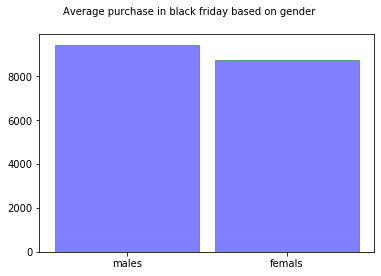

In [41]:
labels=['males','femals']
values = [malesPurchaseMean,femalsPurchaseMean]

plt.bar(labels,values, width=.9, facecolor='b', edgecolor='g', alpha=.5)
plt.text(-0.4,10800,'Average purchase in black friday based on gender')
         
plt.show()

# We can see that males are buying higher value purchases than females, but the difference is not significant

In [42]:
Males_Purchase = df.loc[df['Gender']=='M']
Female_purchase = df.loc[df['Gender']=='F']
print(Males_Purchase.shape[0])
print(Female_purchase.shape[0])

414259
135809


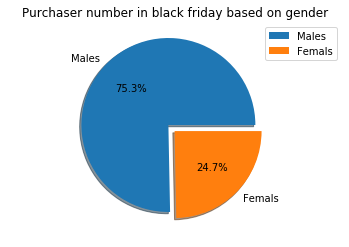

In [43]:
genderCountData = [Males_Purchase.shape[0],Female_purchase.shape[0]]
labels=['Males','Femals']
plt.axis('equal')

plt.pie(genderCountData, labels=labels,
              explode=[0.1,0],
              autopct='%1.1f%%',
              shadow=True,
              startangle=0,
              labeldistance=1.1,
              pctdistance=.6)

plt.legend(labels)
plt.title('Purchaser number in black friday based on gender')
plt.show()

# Above, We can see that Males are more in number as compared to females

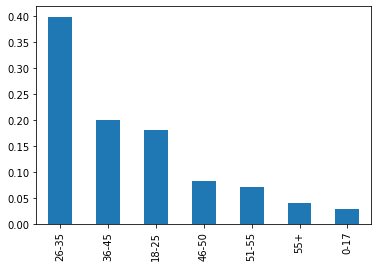

In [44]:
df['Age'].value_counts(normalize=True).plot.bar()
plt.show()

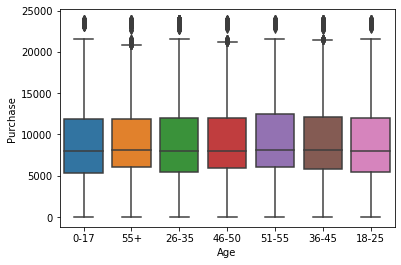

In [45]:
sns.boxplot(x='Age',y='Purchase',data=df)

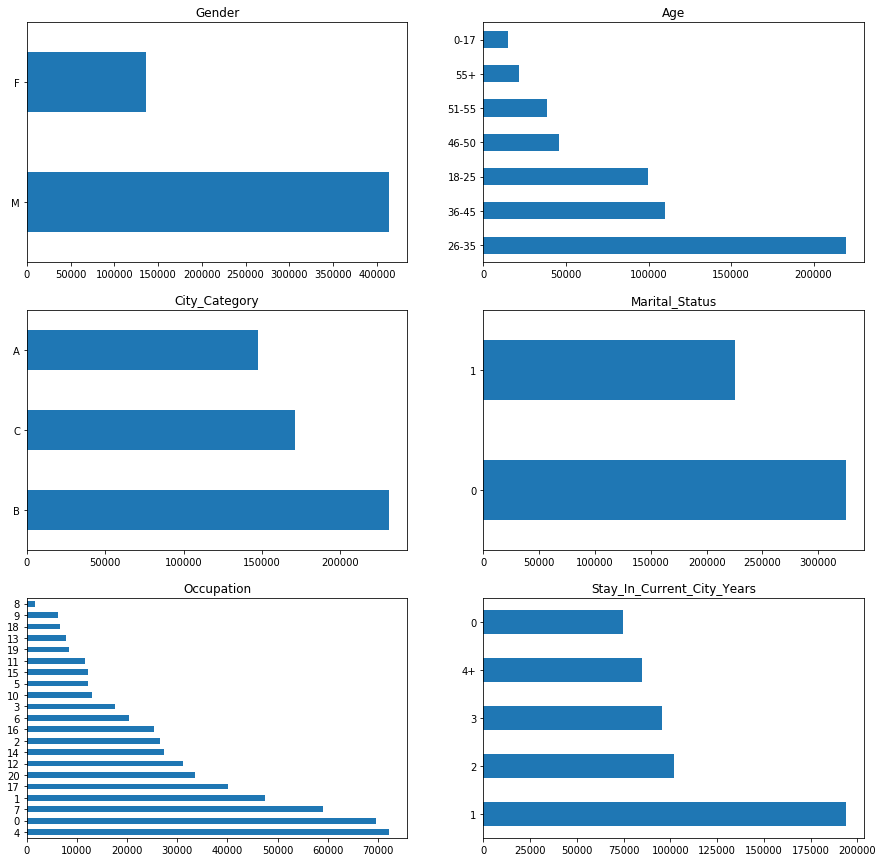

In [46]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=[15, 15])

df['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
df['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
df['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
df['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
df['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
df['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')

# Above we can see in which category we are having more purchases

In [48]:
new_df = dataframe.sort_values(by=['Purchase'],ascending=False)
new_df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,15.0,NaN,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,15.0,NaN,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,15.0,NaN,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,16.0,NaN,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,15.0,NaN,23960
349658,1005848,P00119342,M,51-55,20,A,0,1,10,13.0,NaN,23960
292083,1003045,P00052842,M,46-50,1,B,2,1,10,15.0,NaN,23960
298378,1003947,P00116142,M,26-35,0,C,3,0,10,13.0,16.0,23959
437804,1001387,P00086242,F,51-55,13,B,1,1,10,NaN,NaN,23959
229329,1005367,P00085342,M,18-25,4,A,1,0,10,13.0,NaN,23958


# From above we can see that the product id 'P00116142' & 'P00086242' correspond to the third highest Purchase 